In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ewald construction
This notebook shows how to use xrheed ewald module to superimpose the calculated spot position on the RHEED image.

In [7]:
import xrheed
from xrheed.io import load_data

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pathlib import Path

In [8]:
## Prepare the RHEED data

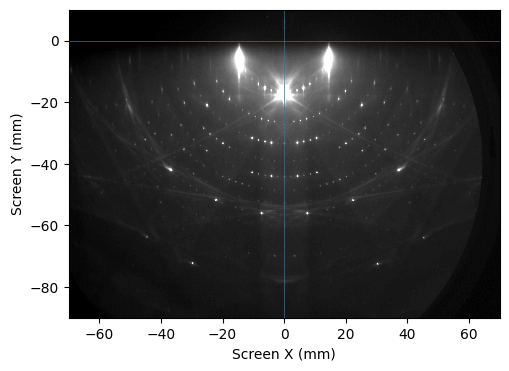

In [15]:
image_dir = Path("example_data")
image_path = image_dir / "Si_111_7x7_112_phi_00.raw"

rheed_image = load_data(image_path, plugin="dsnp_arpes_raw")

# Rotate the image
rheed_image.ri.rotate(-0.4)

# Apply automatic center search again after rotation
rheed_image.ri.apply_image_center(auto_center=True)

rheed_image.ri.screen_roi_width = 70
rheed_image.ri.screen_roi_height = 90

# Use automatic levels adjustment
rheed_image.ri.plot_image(auto_levels=0.5)

plt.show()

## Prepare the 2D lattice

This RHEED image shows the pattern recorded from the Si(111) surface with the apparent (7x7) reconstruction.
First we can calculate the position of the (1x1) spots using the hexagonal 2D lattice with the 3.84 A lattice constant.

It should be also noted that this particular image was recorded for a electron beam aligned along [11-2] direction.

The lattice could be created by profiding basic vectors of the real space.

The `from_bulk_cubic` method allows to create the lattice simply by providing the bulk lattice constant, the `cubic_type`, and the `plane` (only low index planes are supported).

In [19]:
from xrheed.kinematics.lattice import Lattice

In [33]:
hex_lattice = Lattice([3.84, 0], [3.84*0.5, 3.325])
hex_lattice

a1 = [3.840, 0.000] A
a2 = [1.920, 3.325] A

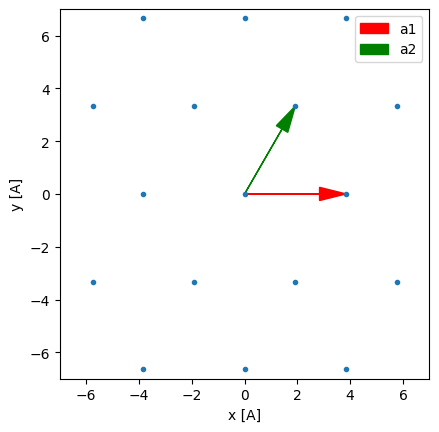

In [39]:
from xrheed.kinematics.lattice import Lattice

si_111_1x1 = Lattice.from_bulk_cubic(a=5.43, cubic_type="FCC", plane='111')

si_111_1x1.plot_real(space_size=7.0)
plt.show()

The x axis used in the lattice shown above is the same as in x-y-z sample geometry.

This means that incident electron beam is directed approximately along this x axis. What is [1-10] direction in that case.

The lattice should be rotated by 30 degrees to agree in the geometry used in this particular RHEED experiment.

Nonetheless, this step could be omitted, since the phi angle (sample azimuthal rotation) could be adjusted later in Ewald construction calculation.

<Axes: xlabel='x [A]', ylabel='y [A]'>

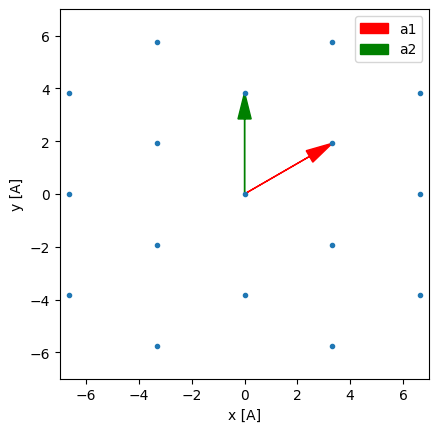

In [40]:
si_111_1x1.rotate(30)
si_111_1x1.plot_real(space_size=7)
plt.show()

Each lattice has both real and inverse representation that are updated automatically.

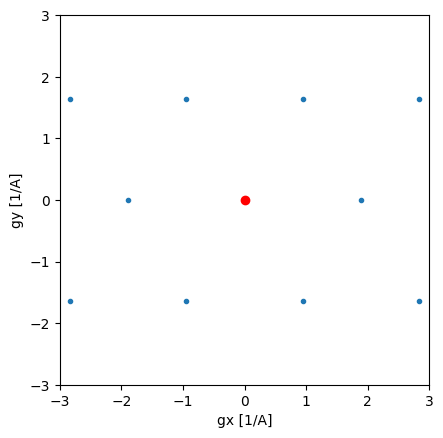

In [43]:
si_111_1x1.plot_inverse(space_size=3.0)
plt.show()

## Calculated spot positions

Finally, having two necesarry ingredients:
- loaded and aligned RHEED image,
- lattice object.

The spot position can be calculated using kinematic theory (Ewald construction) as shown below. 

In general the RHEED image is optional, however to calculate the spot position in an real experimental conditions 
the image is used to provide for example, screen-sample distance, screen scaling, incident theta angle.

Please note that, `Ewald` object creates a separate lattice for it's own purpose (this lattice could be easily scaled for precised matching).

### Ewald construction



In [44]:
from xrheed.kinematics.ewald import Ewald

In [66]:
ew_si_111 = Ewald(lattice=si_111_1x1, 
                  image=rheed_image)

ew_si_111

  Ewald Radius: 69.87 1/A,
  phi: 0.00 deg,
  theta: 1.00 deg,
  lattice_scale: 1.00,
  screen_scale: 9.04 px/mm,
  screen_sample_distance: 309.2 mm,
  b1 = [1.89, -0.00] 1/A,
  b2 = [-0.94, 1.64] 1/A,

In [65]:
ew_si_111.calculate_ewald()
print(ew_si_111.px)
print(ew_si_111.py)

[-6.79439170e+01 -6.12581113e+01 -5.95550812e+01 -5.28452688e+01
 -5.13962650e+01 -4.46663109e+01 -3.77466206e+01 -3.67116179e+01
 -2.97775406e+01 -2.26479723e+01 -2.20269707e+01 -1.48887703e+01
 -7.34232358e+00  1.16614704e-15  0.00000000e+00  7.34232358e+00
  1.48887703e+01  2.26479723e+01  2.20269707e+01  2.97775406e+01
  3.77466206e+01  3.67116179e+01  4.46663109e+01  5.28452688e+01
  5.13962650e+01  6.12581113e+01  5.95550812e+01  6.79439170e+01]


AttributeError: 'Ewald' object has no attribute 'py'

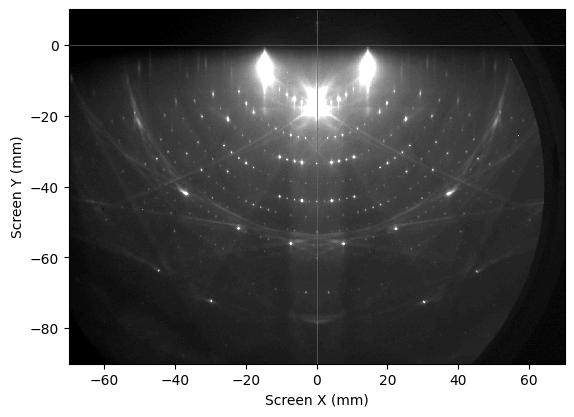

In [ ]:


fig, ax = plt.subplots() 

ew_si_111.plot(ax=ax)
rheed_image.ri.plot_image(ax=ax, auto_levels=1.0)
plt.show()